In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic_train.csv")

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
347088      6
           ..
364506      1
26707       1
347085      1
349252      1
211536      1
Name: Ticket, Length: 681, dtype: int64

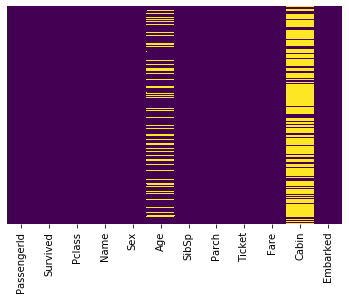

In [7]:
sns.heatmap(titanic.isna(),cmap='viridis',cbar=False,yticklabels=False)
#checking if there are any null values which there are a lot in the Age and Cabin columns

In [8]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
titanic['Name'].value_counts()

Harris, Mr. Walter                        1
Chapman, Mr. John Henry                   1
Frolicher, Miss. Hedwig Margaritha        1
Chibnall, Mrs. (Edith Martha Bowerman)    1
Patchett, Mr. George                      1
                                         ..
Saad, Mr. Amin                            1
Dorking, Mr. Edward Arthur                1
Simonius-Blumer, Col. Oberst Alfons       1
Moran, Mr. Daniel J                       1
Boulos, Miss. Nourelain                   1
Name: Name, Length: 891, dtype: int64

In [10]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

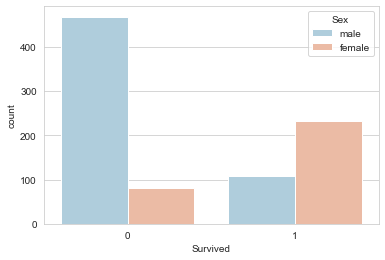

In [11]:
sns.set_style('whitegrid')
sns.countplot(data=titanic,x='Survived',palette='RdBu_r',hue='Sex')

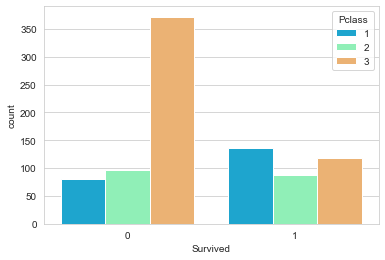

In [12]:
sns.set_style('whitegrid')
sns.countplot(data=titanic,x='Survived',palette='rainbow',hue='Pclass')

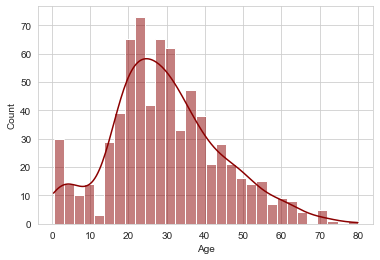

In [13]:
sns.histplot(titanic['Age'].dropna(),color='darkred',bins=30,kde=True)

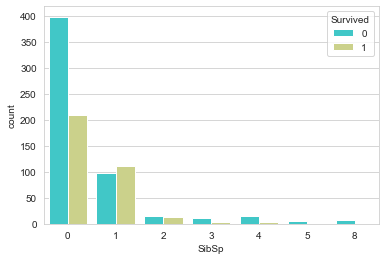

In [14]:
sns.countplot(data=titanic, x='SibSp',hue='Survived',palette='rainbow')

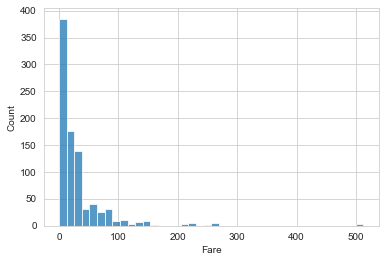

In [15]:
sns.histplot(data=titanic,x='Fare',bins=40)

In [16]:
#fill in all the null values in age column by the avg age by passenger class
titanic.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
def new_age(col):
    p_class = col[0]
    age=col[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 38.23
        elif p_class == 2:
            return 29.88
        else:
            return 25.14
    return age
titanic['Age']=titanic[['Pclass','Age']].apply(lambda x: new_age(x), axis=1)
titanic['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    25.14
889    26.00
890    32.00
Name: Age, Length: 891, dtype: float64

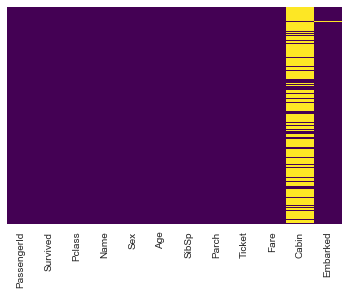

In [19]:
sns.heatmap(titanic.isna(),cmap='viridis', cbar=False, yticklabels=False)

In [20]:
titanic.drop('Cabin',axis=1,inplace=True)

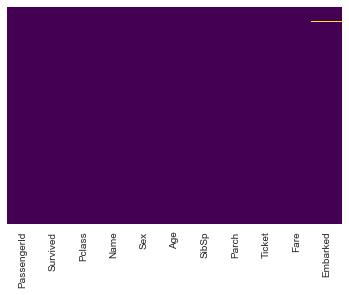

In [21]:
sns.heatmap(titanic.isna(),cmap='viridis', cbar=False, yticklabels=False)

In [22]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

titanic.drop(['Sex','Embarked'],inplace=True,axis=1)
titanic=pd.concat([titanic,sex,embark],axis=1)


In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [25]:
print(embark.head())

   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [27]:
titanic.drop('Name',inplace=True,axis=1)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,1,0,1


In [29]:
titanic.drop('Ticket',inplace=True,axis=1)

In [49]:
titanic.head()
titanic.dropna(inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],test_size=.3,random_state=101)

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)

In [52]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pred = logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [56]:
print(confusion_matrix(y_test,pred))

[[134  20]
 [ 37  77]]
